In [247]:
%matplotlib inline
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Notes on gas prices
1. Gather data for nominal price of gas standardize on yearly price
2. cleaning and transforming
3. adjust prices for inflation
4. graph the nominal and adjusted prices 
5. choose some other item with historical prices to compare to gas.

In [248]:
r= requests.get("http://www.eia.gov/totalenergy/data/annual/showtext.cfm?t=ptb0524")
soup = BeautifulSoup(r.text)

/usr/local/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [249]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="en-us" http-equiv="Content-Language"/>
  <meta content="all" name="robots"/>
  <meta content="EIA - Energy Information Administration" name="agency"/>
  <meta content="official energy statistics, data, analysis and forecasting" name="subject"/>
  <meta content="Energy Information Administration - EIA - Official Energy Statistics from the U.S. Government" name="Description"/>
  <link href="/global/styles/screen.css" media="screen, projection" rel="stylesheet" type="text/css"/>
  <link href="/global/scripts/jquery/datepicker/jquery-ui-dp.custom.css" rel="stylesheet" type="text/css"/>
  <link href="/global/styles/EIA_global.css" media="screen, projecti

In [250]:
allrows = soup.find_all("tr")
allrows

[<tr><td colspan="13" style="border:1;">Table 5.24  Retail Motor Gasoline and On-Highway Diesel Fuel Prices, 1949-2011<br/>                       (Dollars per Gallon)</td></tr>,
 <tr><td colspan="1" rowspan="3"><br/><br/><br/><br/><br/>Year</td>
 <td colspan="8" rowspan="1">Motor Gasoline by Grade</td>
 <td colspan="3" rowspan="1">Regular Motor Gasoline by Area Type</td>
 <td colspan="1" rowspan="2"><br/><br/>On-Highway<br/>Diesel Fuel </td>
 </tr>,
 <tr>
 <td colspan="2" rowspan="1"><br/>Leaded Regular </td>
 <td colspan="2" rowspan="1"><br/>Unleaded Regular</td>
 <td colspan="2" rowspan="1"><br/>Unleaded Premium</td>
 <td colspan="2" rowspan="1"><br/>All  Grades</td>
 <td colspan="1" rowspan="1">Conventional<br/>Gasoline Areas <sup>1</sup><sup>,2</sup></td>
 <td colspan="1" rowspan="1">Reformulated<br/>Gasoline Areas <sup>3</sup><sup>,4</sup></td>
 <td colspan="1" rowspan="1"><br/>All Areas</td>
 </tr>,
 <tr>
 <td colspan="1" rowspan="1">Nominal <sup>5</sup></td>
 <td colspan="1" row

In [251]:
allrows

[<tr><td colspan="13" style="border:1;">Table 5.24  Retail Motor Gasoline and On-Highway Diesel Fuel Prices, 1949-2011<br/>                       (Dollars per Gallon)</td></tr>,
 <tr><td colspan="1" rowspan="3"><br/><br/><br/><br/><br/>Year</td>
 <td colspan="8" rowspan="1">Motor Gasoline by Grade</td>
 <td colspan="3" rowspan="1">Regular Motor Gasoline by Area Type</td>
 <td colspan="1" rowspan="2"><br/><br/>On-Highway<br/>Diesel Fuel </td>
 </tr>,
 <tr>
 <td colspan="2" rowspan="1"><br/>Leaded Regular </td>
 <td colspan="2" rowspan="1"><br/>Unleaded Regular</td>
 <td colspan="2" rowspan="1"><br/>Unleaded Premium</td>
 <td colspan="2" rowspan="1"><br/>All  Grades</td>
 <td colspan="1" rowspan="1">Conventional<br/>Gasoline Areas <sup>1</sup><sup>,2</sup></td>
 <td colspan="1" rowspan="1">Reformulated<br/>Gasoline Areas <sup>3</sup><sup>,4</sup></td>
 <td colspan="1" rowspan="1"><br/>All Areas</td>
 </tr>,
 <tr>
 <td colspan="1" rowspan="1">Nominal <sup>5</sup></td>
 <td colspan="1" row

In [278]:
rawdata = {'year':[], 'price':[]}

allrows = soup.find_all("tr")
for row in allrows[4:4+2011-1949+1]:
    el = row.find_all('td')
    year = el[0].contents[0]
    if year < '1990':
        price = el[1].contents[-1]
    else:
        price = el[3].contents[-1]
    try:
       iyear = int(year.strip())
    except:
       print("bad data for year", year)
    try:
       fprice = float(price.strip())
    except:
       print("bad data for price", price)

    rawdata['year'].append(iyear)
    rawdata['price'].append(fprice)

<class 'dict'>


In [253]:
onerow = allrows[4].find_all('td')[0]

print(onerow.text)
print(int(onerow.text) == 1949)

1949
True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1fd1cf28>], dtype=object)

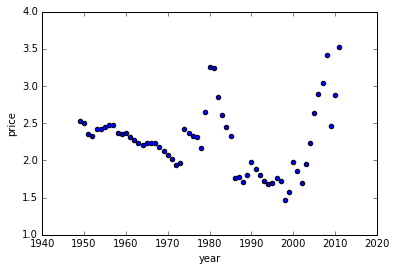

In [254]:
gasPricesPerYear = {'year':[], 'price':[]}
dfs = {}

xls = pd.ExcelFile("SeriesReport-20160909115631_30b599.xlsx")
dfs = xls.parse('BLS Data Series', skiprows=46, skip_footer = 4)
dfs = dfs.get_values()

#cpiFor2011 = dfs[-1][1]
#print('cpi for 2011: ', cpiFor2011)

cpiFor2016 = 238.78

def getCPIAdjustedPrice(cpiFor2016, cpiForYear, price):
    return price * (cpiFor2016/cpiForYear)

for row in range(4,67):
    year = allrows[row].find_all('td')[0].text
    cpiForYear=dfs[row-4][1]
    
    leadedNominalPrice = allrows[row].find_all('td')[1].text.strip()    
    if leadedNominalPrice[0] == 'R':
        leadedNominalPrice = leadedNominalPrice.strip('R ')
        
    unLeadedNominalPrice = allrows[row].find_all('td')[3].text.strip()
    if unLeadedNominalPrice[0] == 'R':
        unLeadedNominalPrice = unLeadedNominalPrice.strip('R ')
        
    if int(year) > 1990:
        gasPricesPerYear['year'].append(int(year))
        gasPricesPerYear['price'].append(getCPIAdjustedPrice(cpiFor2011, cpiForYear, float(unLeadedNominalPrice)))
        #print(year, cpiForCurrentYear, unLeadedNominalPrice, gasPricesPerYear[int(year)])
    else:
        gasPricesPerYear['year'].append(int(year))
        gasPricesPerYear['price'].append(getCPIAdjustedPrice(cpiFor2011, cpiForYear, float(leadedNominalPrice)))
        #print(year, cpiForCurrentYear, leadedNominalPrice, gasPricesPerYear[int(year)]) 
        
gasPricesPerYear = pd.DataFrame(gasPricesPerYear)
#print(gasPricesPerYear)
gasPricesPerYear.plot(x= 'year', y = 'price', kind='scatter', subplots = True)

In [255]:
df = pd.DataFrame(rawdata)
df

,price,year
0,0.268,1949
1,0.268,1950
2,0.272,1951
3,0.274,1952
4,0.287,1953
5,0.290,1954
6,0.291,1955
7,0.299,1956
8,0.310,1957
9,0.304,1958


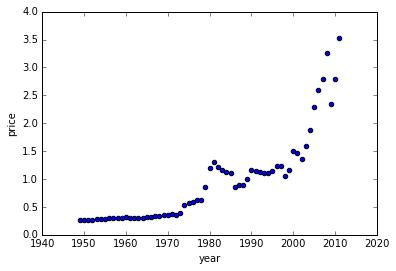

In [256]:
df.plot(x='year', y = 'price', kind='scatter')
#df.plot?
#series: shows row

In [257]:
data = pd.read_excel('CPI.xlsx', skiprows = range(9), header = 1)
data

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1913,9.800,9.800,9.800,9.800,9.700,9.800,9.900,9.900,10.000,10.000,10.100,10.000,NaN,NaN
1,1914,10.000,9.900,9.900,9.800,9.900,9.900,10.000,10.200,10.200,10.100,10.200,10.100,NaN,NaN
2,1915,10.100,10.000,9.900,10.000,10.100,10.100,10.100,10.100,10.100,10.200,10.300,10.300,NaN,NaN
3,1916,10.400,10.400,10.500,10.600,10.700,10.800,10.800,10.900,11.100,11.300,11.500,11.600,NaN,NaN
4,1917,11.700,12.000,12.000,12.600,12.800,13.000,12.800,13.000,13.300,13.500,13.500,13.700,NaN,NaN
5,1918,14.000,14.100,14.000,14.200,14.500,14.700,15.100,15.400,15.700,16.000,16.300,16.500,NaN,NaN
6,1919,16.500,16.200,16.400,16.700,16.900,16.900,17.400,17.700,17.800,18.100,18.500,18.900,NaN,NaN
7,1920,19.300,19.500,19.700,20.300,20.600,20.900,20.800,20.300,20.000,19.900,19.800,19.400,NaN,NaN
8,1921,19.000,18.400,18.300,18.100,17.700,17.600,17.700,17.700,17.500,17.500,17.400,17.300,NaN,NaN
9,1922,16.900,16.900,16.700,16.700,16.700,16.700,16.800,16.600,16.600,16.700,16.800,16.900,NaN,NaN


In [258]:
cols=list(data)
cols.remove('Year')
cols.remove('HALF1')
cols.remove('HALF2')
cols

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [267]:
data["Average"]=data[cols].mean(axis=1)
data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,Average
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,NaN,NaN,9.883333
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,NaN,NaN,10.016667
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,NaN,NaN,10.108333
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,NaN,NaN,10.883333
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,NaN,NaN,12.825000


In [269]:
cpi=data.set_index(keys="Year")
cpi.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,Average
Year,,,,,,,,,,,,,,,
1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,NaN,NaN,9.883333
1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,NaN,NaN,10.016667
1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,NaN,NaN,10.108333
1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,NaN,NaN,10.883333
1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,NaN,NaN,12.825000


In [261]:
cpi=data.set_index(keys="Year")
cpi.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,Average
Year,,,,,,,,,,,,,,,
1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,NaN,NaN,9.883333
1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,NaN,NaN,10.016667
1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,NaN,NaN,10.108333
1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,NaN,NaN,10.883333
1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,NaN,NaN,12.825000


In [270]:
cpi2016=238.78
adj=df.merge(right=cpi,left_on="year", right_index=True)

In [271]:
adj.head()

,price,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,Average
0,0.268,1949,24.0,23.8,23.8,23.9,23.8,23.9,23.7,23.8,23.9,23.7,23.8,23.6,NaN,NaN,23.808333
1,0.268,1950,23.5,23.5,23.6,23.6,23.7,23.8,24.1,24.3,24.4,24.6,24.7,25.0,NaN,NaN,24.066667
2,0.272,1951,25.4,25.7,25.8,25.8,25.9,25.9,25.9,25.9,26.1,26.2,26.4,26.5,NaN,NaN,25.958333
3,0.274,1952,26.5,26.3,26.3,26.4,26.4,26.5,26.7,26.7,26.7,26.7,26.7,26.7,NaN,NaN,26.550000
4,0.287,1953,26.6,26.5,26.6,26.6,26.7,26.8,26.8,26.9,26.9,27.0,26.9,26.9,NaN,NaN,26.766667


In [272]:
adj['adj_price']=adj.price*238.78/adj.Average

In [273]:
adj.tail()

,price,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,Average,adj_price
58,2.801,2007,202.416,203.499,205.352,206.686,207.949,208.352,208.299,207.917,208.490,208.936,210.177,210.036,205.709,208.976,207.342417,3.225692
59,3.266,2008,211.080,211.693,213.528,214.823,216.632,218.815,219.964,219.086,218.783,216.573,212.425,210.228,214.429,216.177,215.302500,3.622139
60,2.350,2009,211.143,212.193,212.709,213.240,213.856,215.693,215.351,215.834,215.969,216.177,216.330,215.949,213.139,215.935,214.537000,2.615553
61,2.788,2010,216.687,216.741,217.631,218.009,218.178,217.965,218.011,218.312,218.439,218.711,218.803,219.179,217.535,218.576,218.055500,3.052978
62,3.527,2011,220.223,221.309,223.467,224.906,225.964,225.722,225.922,226.545,226.889,226.421,226.230,225.672,223.598,226.280,224.939167,3.744021


In [274]:
adj.to_excel("gasPricesAdjustedforInflation.xlsx")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1fb144a8>], dtype=object)

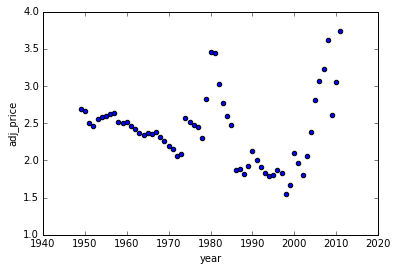

In [275]:
adj.plot(x="year", y="adj_price", kind="scatter", subplots=True)

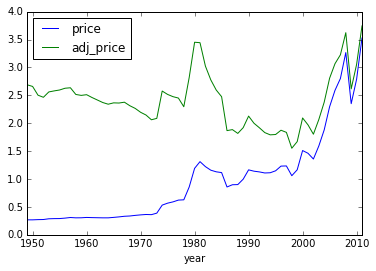

In [276]:
xx=adj[['price','adj_price']]
xx.index=adj.year
xx.plot()